In this document we inspect the Android 77 dataset, including plotting the histogram shown in the master thesis.

To get the correct formatting of the histogram this cell might need to be run twice.

## Import Statements

In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
def load_dataset():
    path = os.getcwd() + "\\..\\..\\json-files\\Intermediate Files\\dataset_andapps77.json"
    return pd.read_json(path)

raw = load_dataset()
raw[0:3]

,category,description,label,packageName,reqPermissions,playCategory,playAuthors
0,none,none,Zalando,de.zalando.mobile,"[{'first': 'android.permission.INTERNET', 'sec...",Shopping,Zalando SE
1,none,none,Drivstoffappen,com.raskebiler.drivstoff.appen,"[{'first': 'android.permission.INTERNET', 'sec...",Auto & Vehicles,Raskebiler AS
2,Music & Audio,none,Shazam,com.shazam.android,"[{'first': 'android.permission.RECORD_AUDIO', ...",Music & Audio,"Apple, Inc."


### Table three of the applications used in scenarios

In [3]:
raw[0:-1].loc[raw[0:-1]['label'] == 'Zoom']

,category,description,label,packageName,reqPermissions,playCategory,playAuthors
16,Productivity,none,Zoom,us.zoom.videomeetings,[{'first': 'com.google.android.c2dm.permission...,Business,zoom.us


In [4]:
raw[0:-1].loc[raw[0:-1]['label'] == 'Authenticator']

,category,description,label,packageName,reqPermissions,playCategory,playAuthors
66,Productivity,none,Authenticator,com.azure.authenticator,[{'first': 'android.permission.SYSTEM_ALERT_WI...,Business,Microsoft Corporation


In [5]:
raw[0:-1].loc[raw[0:-1]['label'] == 'NRK TV']

,category,description,label,packageName,reqPermissions,playCategory,playAuthors
27,none,none,NRK TV,no.nrk.tv,"[{'first': 'android.permission.INTERNET', 'sec...",Entertainment,NRK


### Table finished

In [6]:
def _count_info_column(name):
    counter = Counter(raw[name])
    print(counter)

_count_info_column("playCategory")
print("\n")

_count_info_column("playAuthors")
print("\n")

Counter({'Travel & Local': 11, 'Shopping': 8, 'Tools': 6, 'Food & Drink': 6, 'Entertainment': 6, 'Music & Audio': 4, 'Maps & Navigation': 4, 'Finance': 4, 'Lifestyle': 4, 'Auto & Vehicles': 3, 'Education': 3, 'Social': 3, 'Business': 3, 'Communication': 2, 'Medical': 2, 'Productivity': 2, 'Health & Fitness': 2, 'House & Home': 1, 'Event': 1, 'Video Players & Editors': 1, 'News & Magazines': 1})


Counter({'Microsoft Corporation': 3, 'Ruter As': 2, 'Schibsted Norge': 2, 'Google LLC': 2, 'Zalando SE': 1, 'Raskebiler AS': 1, 'Apple, Inc.': 1, 'Fjordkraft AS': 1, 'Vipps AS': 1, 'Coop Norge': 1, 'WeHunt Nordic AB': 1, 'WhatsApp LLC': 1, "McDonald's Apps": 1, 'Gamma Play': 1, 'FINN.no': 1, 'Duolingo': 1, 'Discovery Digital': 1, 'JVSTUDIOS': 1, 'reddit Inc.': 1, 'zoom.us': 1, 'Telenor Norge': 1, 'Norsk Helsenett SF': 1, 'Instagram': 1, 'Pintrest': 1, 'DNB ASA': 1, 'Statens vegvesen / NPRA': 1, 'Apple': 1, 'NRK': 1, 'European Union': 1, 'Posten & Bring': 1, 'Tolletaten': 1, 'Pizzabakeren': 1, 

## Investigate permissions

Permissions are a list of dictionaries with the keys first and second, where first reference the permission, and second reference the protection level.

In [7]:
raw["reqPermissions"][0:2]

0    [{'first': 'android.permission.INTERNET', 'sec...
1    [{'first': 'android.permission.INTERNET', 'sec...
Name: reqPermissions, dtype: object

In [8]:
raw["reqPermissions"][0][0]

{'first': 'android.permission.INTERNET', 'second': 'normal'}

### Making a dataset object that is easier to operate on

In [9]:
class Dataset:
    def __init__(self, df):
        self.name = list(df["packageName"])
        self.labels = list(df["label"])
        self.category = list(df["category"])
        self.playCategory = list(df["playCategory"])
        self.playAuthors = list(df["playAuthors"])
        self.permissions = [[p['first'] for p in req] for req in df["reqPermissions"]]
        self.protections = [[p['second'] for p in req] for req in df["reqPermissions"]]
    
    def __getitem__(self, i):
        return {'name': self.name[i], 
                'label': self.labels[i],
                'category': self.category[i], 
                'playCategory': self.playCategory[i],
                'playAthors': self.playAuthors[i],
                'permissions': self.permissions[i],
                'protections': self.protections[i]}
    
    def __len__(self):
        return len(self.name)

In [10]:
dataset = Dataset(raw)
dataset[0]

{'name': 'de.zalando.mobile',
 'label': 'Zalando',
 'category': 'none',
 'playCategory': 'Shopping',
 'playAthors': 'Zalando SE',
 'permissions': ['android.permission.INTERNET',
  'android.permission.WRITE_EXTERNAL_STORAGE',
  'android.permission.CAMERA',
  'android.permission.FOREGROUND_SERVICE',
  'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
  'android.permission.ACCESS_WIFI_STATE',
  'android.permission.ACCESS_NETWORK_STATE',
  'android.permission.WAKE_LOCK',
  'de.zalando.mobile.permission.A4S_SEND',
  'android.permission.READ_EXTERNAL_STORAGE',
  'de.zalando.mobile.permission.C2D_MESSAGE',
  'com.google.android.c2dm.permission.RECEIVE',
  'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE',
  'android.permission.RECEIVE_BOOT_COMPLETED'],
 'protections': ['normal',
  'dangerous',
  'dangerous',
  'normal',
  'normal',
  'normal',
  'normal',
  'normal',
  'signature',
  'dangerous',
  'signature',
  'normal',
  'normal',
  'normal']}

In [11]:
print(dataset[0]['permissions'][8])
print(dataset[0]['protections'][8])

de.zalando.mobile.permission.A4S_SEND
signature


In [12]:
# checking the distribution of application categories
categories = [d['category'] for d in dataset]
counter = Counter(categories)
counter

Counter({'none': 48,
         'Music & Audio': 4,
         'Productivity': 12,
         'Maps & Navigation': 4,
         'Social & Communication': 7,
         'Movies & Video': 2})

In [13]:
# checking the avg of requested android permissions
permissions = [app['permissions'] for app in dataset]

android_permissions = [
    [permission for permission in lst 
     if permission.startswith('android.permission.')] 
    for lst in permissions]

req_permissions = [len(lst) for lst in android_permissions]
print(sorted(req_permissions))
print('mean:', np.mean(req_permissions))
print('median:', np.median(req_permissions))

[1, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 16, 16, 16, 16, 18, 18, 18, 18, 19, 20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 27, 27, 29, 31, 42, 42, 68]
mean: 14.792207792207792
median: 12.0


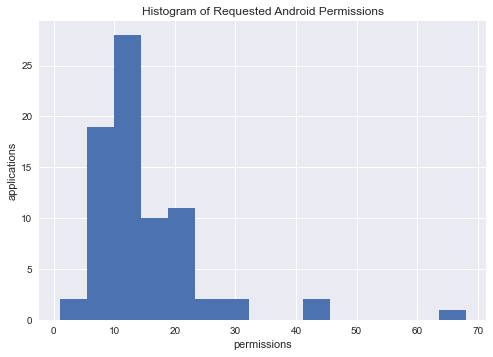

In [18]:
# plotting histogram
plt.hist(req_permissions, bins=15)
plt.style.use('seaborn')
plt.title('Histogram of Requested Android Permissions')
plt.ylabel('applications')
plt.xlabel('permissions')
plt.savefig('histogram-bin-15')
plt.show()

#### Having permission groups could perhaps be good!

Now doing statistics on the number of permissions an app have!

In [15]:
list(filter(lambda x: x == 'dangerous', dataset[0]['protections']))

['dangerous', 'dangerous', 'dangerous']

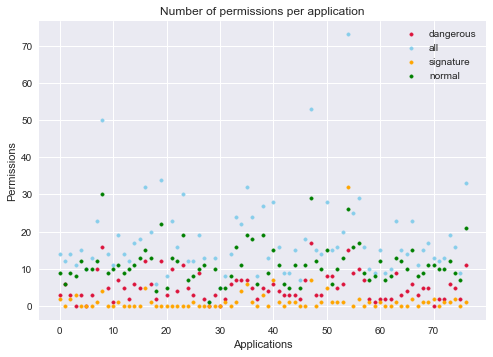

In [16]:
def _plot_permissions():
    x = list(range(len(dataset)))
    
    y_all = [len(dataset[i]['permissions']) for i in range(len(dataset))]        
    
    y_danger = [
        len(list(filter(lambda x: x == 'dangerous', dataset[i]['protections'])))
        for i in range(len(dataset))] 
    
    y_signature = [
        len(list(filter(lambda x: x == 'signature', dataset[i]['protections'])))
        for i in range(len(dataset))] 
    
    y_normal = [
        len(list(filter(lambda x: x == 'normal', dataset[i]['protections'])))
        for i in range(len(dataset))] 
    
    plt.scatter(x, y_danger, marker='.', color='crimson', label='dangerous')
    plt.scatter(x, y_all, marker='.', color='skyblue', label='all')
    plt.scatter(x, y_signature, marker='.', color='orange', label='signature')
    plt.scatter(x, y_normal, marker='.', color='green', label='normal')
        
    plt.xlabel("Applications")
    plt.ylabel("Permissions")
    plt.title("Number of permissions per application")
    plt.legend()
    plt.show() 
    
_plot_permissions()

In [17]:
outliers = [i for i in range(len(dataset)) if len(dataset[i]['permissions']) > 40]
print(outliers)
print(dataset[8]["label"], dataset[8]["playCategory"])
print(dataset[47]["label"],dataset[8]["playCategory"])
print(dataset[50]["label"], dataset[8]["playCategory"])

[8, 47, 54]
WhatsApp Communication
Messenger Communication
Yango Communication
